In [1]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval


In [6]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '14211820' #Columbia Slough, Portland OR

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2020-10-01', end='2021-07-30')
df

,00060_Mean,00060_Mean_cd,site_no,72137_Mean,72137_Mean_cd
datetime,,,,,
2020-10-01 00:00:00+00:00,100.0,P,14211820,90.2,P
2020-10-02 00:00:00+00:00,51.1,P,14211820,84.6,P
2020-10-03 00:00:00+00:00,64.7,P,14211820,81.4,P
2020-10-04 00:00:00+00:00,42.1,P,14211820,73.5,P
2020-10-05 00:00:00+00:00,77.5,P,14211820,103.0,P
...,...,...,...,...,...
2021-07-26 00:00:00+00:00,57.8,P,14211820,89.6,P
2021-07-27 00:00:00+00:00,33.6,P,14211820,85.0,"P, e"
2021-07-28 00:00:00+00:00,105.0,P,14211820,153.0,"P, e"


<AxesSubplot:xlabel='datetime'>

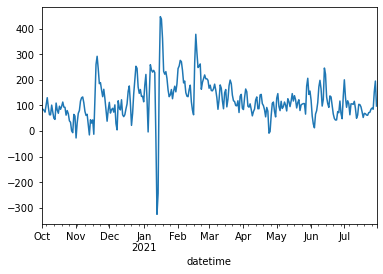

In [7]:
# Simple plot
df['72137_Mean'].plot() #Discharge, tidally filtered, cubic feet per second DV

Q1) This is a graph of the tidally filtered discharge in cubic feet per second of the Colombia river slough in Portland OR. The data was missing for the end of 2021 so this only goes until August.

In [91]:
sites = ['14211720','14211315','14123500']

for site in sites: #for each site get daily means and initialize mean for time period
    df = nwis.get_record(sites=site, service='dv', start='2020-10-31', end='2021-09-30')
    meandd = 0
    
    for day in range(len(df['00060_Mean'])-1): #for each day in time period, add daily mean 
        meandd += (df['00060_Mean'][day])
    meandd = meandd/len(df['00060_Mean'])# divide by length 0f time period
    
    print("site:",site)
    print("mean using func:",df['00060_Mean'].mean() )
    print("mean using my werid process:", meandd)
    

site: 14211720
mean using func: 27817.34328358209
mean using my werid process: 27777.641791044774
site: 14211315
mean using func: 10.142710843373495
mean using my werid process: 10.140843373493972
site: 14123500
mean using func: 909.0746268656717
mean using my werid process: 907.5582089552239


Question 2)

<table>
  <tr>
    <th>Site Name</th>
    <th>Site Number</th>
    <th>Mean Daily Discharge (Oct 31, 2020 to Sep 30, 2021)</th>
  </tr>
  <tr>
    <td>WHITE SALMON RIVER NEAR UNDERWOOD, WA</td>
    <td>14123500</td>
    <td>909</td>
  </tr>
  <tr>
    <td>TRYON CREEK NEAR LAKE OSWEGO, OR</td>
    <td>14211315</td>
    <td>10</td>
  </tr>
    <tr>
    <td>WILLAMETTE RIVER AT PORTLAND, OR</td>
    <td>14211720</td>
    <td>27817</td>
  </tr>
</table>

In [32]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [33]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank                           Mountain peak        Mountain range  \
 0      1               Mount Hood[6][7][8][9][a]         Cascade Range   
 1      2      Mount Jefferson[10][11][12][13][b]         Cascade Range   
 2      3            South Sister[14][15][16][17]         Cascade Range   
 3      4         North Sister[18][19][20][21][c]         Cascade Range   
 4      5        Middle Sister[22][23][24][25][d]         Cascade Range   
 5      6        Sacajawea Peak[26][27][28][e][f]     Wallowa Mountains   
 6      7          Steens Mountain[29][30][31][g]       Steens Mountain   
 7      8        Aneroid Mountain[32][33][34][35]     Wallowa Mountains   
 8      9               Twin Peaks[36][37][38][h]     Wallowa Mountains   
 9     10            Red Mountain[39][40][41][42]     Wallowa Mountains   
 10    11  M

In [34]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [45]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

In [46]:
mountain_stats['Isolation'].iloc[0]

'92.2\xa0km'

In [47]:
# The Isolation is string position 0 to -3
iso = float(mountain_stats['Isolation'].iloc[0][:-3])
iso

92.2

In [48]:
isolations = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-3])
    isolations.append(iso)
isolations

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [64]:
#add iso popup
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolations[i]).add_to(map)
map

In [95]:
#EXTRA CREDIT

mountain_stats['Mountain peak'].iloc[0]
# The name is string before "["
name = mountain_stats['Mountain peak'].iloc[0].rsplit('[')[0]
name

'Mount Hood'

In [61]:
names = []
for i in range(len(mountain_stats)):
    name = mountain_stats['Mountain peak'].iloc[i].rsplit('[')[0]
    names.append(name)

['Mount Hood',
 'Mount Jefferson',
 'South Sister',
 'North Sister',
 'Middle Sister',
 'Sacajawea Peak',
 'Steens Mountain',
 'Aneroid Mountain',
 'Twin Peaks',
 'Red Mountain',
 'Mount McLoughlin',
 'Elkhorn Peak',
 'Mount Thielsen',
 'Broken Top',
 'Rock Creek Butte',
 'Mount Bachelor',
 'Strawberry Mountain',
 'Mount Scott',
 'Diamond Peak',
 'Pueblo Mountain',
 'Crane Mountain',
 'Drake Peak',
 'Mount Bailey',
 'Gearhart Mountain',
 'Aspen Butte',
 'Yamsay Mountain',
 'Vinegar Hill',
 'Pelican Butte',
 'Lookout Mountain',
 'Warner Peak',
 'Paulina Peak']

In [127]:
#add name to popup
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    popup_info = ("%s, Isolation (km): %f"%(names[i],isolations[i]))
    folium.Marker(coords[i], popup= popup_info).add_to(map)
map

In [75]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
There is no [mac64] chromedriver for browser  in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_mac64.zip
Driver has been saved in cache [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102]


In [82]:
# Define test URL
places = ['1844 SW Morrison St, Portland, OR 97205','800 Occidental Ave S, Seattle, WA 98134','1001 Stadium Dr, Inglewood, CA 90301','2700 Martin Luther King Jr Blvd, Eugene, OR 97401']
places_coords = []

for place in places:
       
    # Define URL to search in Google Maps 
    url = 'https://www.google.com/maps/place/' + place
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    #is this even using the click function?
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    places_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


In [84]:
places

['1844 SW Morrison St, Portland, OR 97205',
 '800 Occidental Ave S, Seattle, WA 98134',
 '1001 Stadium Dr, Inglewood, CA 90301',
 '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [126]:
map = folium.Map(location=[44, -121], zoom_start=4)
for i in range(0, len(places)):
    folium.Marker(places_coords[i], popup=places[i]).add_to(map)
map

Question 4)

In [106]:
# Import package
import xarray as xr

# Define filepath
fp = '.'

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [108]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")

# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()


# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort




====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/nicogouveia/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current go

In [124]:
ski_resort_names
#2 - mt ashland
#5 - hoodoo
#15 - willamette

ski_resort_coords

[('44.9629273', '-118.2357129'),
 ('42.081689', '-122.7069427'),
 ('45.4188609', '-121.6064525'),
 ('45.2816889', '-117.1148305'),
 ('44.4086477', '-121.8736045'),
 ('42.081689', '-122.7069427'),
 ('44.0028975', '-121.6812601'),
 ('45.331759', '-121.6673735'),
 ('45.2943644', '-121.7896261'),
 ('45.2871456', '-121.7312302'),
 ('45.7552462', '-118.0536097'),
 ('44.03046', '-123.4894862'),
 ('45.3311319', '-121.7131951'),
 ('42.237378', '-120.2968271'),
 ('43.6000579', '-122.0387287')]

In [118]:
ashland = xds.sel(latitude = ski_resort_coords[1][0], longitude = ski_resort_coords[1][1], method = 'nearest')
hoodoo = xds.sel(latitude = ski_resort_coords[4][0], longitude = ski_resort_coords[4][1], method = 'nearest')
willamette = xds.sel(latitude = ski_resort_coords[14][0], longitude = ski_resort_coords[14][1], method = 'nearest')

In [122]:
print("ashland:", ashland['sf'].values.sum())
print("hoodoo:",hoodoo['sf'].values.sum())
print("willamette:",willamette['sf'].values.sum())

ashland: 0.009228621
hoodoo: 0.018596929
willamette: 0.019636936


Q5) Willamette has the highest snowfall